In [1]:
from models import DEA
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

from is_efficient import is_efficient
from utils import arr2matrix, initializeUnif, df2latex, handle_commas, round_elements, plot, plot3d, plotwithfrontier, perpendicular_distance, extend_line
from utils import find_intersection, plot_fdh, initializeZ, load_results
from scipy.stats import norm

In [3]:
from li_test import li_test

In [4]:
pisa_results = load_results()


2024-11-13 19:25:49.178 Python[28192:2129193] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-13 19:25:51.280 Python[28192:2129193] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


Results loaded from /Users/harshit/Desktop/deacodes/PISA_results.pkl


In [5]:
def stats(df):
    avg_eff = df['efficiency'].mean()
    min_eff = df['efficiency'].min()
    max_eff = df['efficiency'].max()
    std_dev_eff = df['efficiency'].std()
    num_eff = df['is_efficient'].sum()
    num_considered = len(df)

    result = {
        'avg': avg_eff,
        'min': min_eff,
        'max': max_eff,
        'std_dev': std_dev_eff,
        'num_eff': num_eff,
        'num_considered': num_considered
    }
    return result

def plot_comparison(model1, model2):
    df1, name1 = model1
    df2, name2 = model2
    
    stats1 = stats(df1)
    stats2 = stats(df2)
    
    eff1 = df1['efficiency']
    eff2 = df2['efficiency']
    
    ratio1 = stats1['num_eff'] / stats1['num_considered']
    ratio2 = stats2['num_eff'] / stats2['num_considered']
    
    print(f"{name1} - Efficiency ratio (num_eff / num_considered): {ratio1:.2f}")
    print(f"{name2} - Efficiency ratio (num_eff / num_considered): {ratio2:.2f}")
    
    plt.figure(figsize=(12, 6))

    sns.histplot(eff1, kde=False, color='blue', bins=15, stat='density', label=f'{name1} Efficiency', alpha=0.6)
    mean1, std_dev1 = eff1.mean(), eff1.std()
    x1 = np.linspace(mean1 - 3*std_dev1, mean1 + 3*std_dev1, 100)
    plt.plot(x1, norm.pdf(x1, mean1, std_dev1), color='blue', linestyle='--', label=f'{name1} Gaussian')

    sns.histplot(eff2, kde=False, color='green', bins=15, stat='density', label=f'{name2} Efficiency', alpha=0.6)
    mean2, std_dev2 = eff2.mean(), eff2.std()
    x2 = np.linspace(mean2 - 3*std_dev2, mean2 + 3*std_dev2, 100)
    plt.plot(x2, norm.pdf(x2, mean2, std_dev2), color='green', linestyle='--', label=f'{name2} Gaussian')

    plt.title(f"Efficiency Distribution Comparison Between {name1} and {name2}")
    plt.xlabel("Efficiency")
    plt.ylabel("Density")
    plt.legend()

    plt.show()



In [6]:
# VRS (FDH vs BCC)

In [7]:
stats_FDHVRS = stats(pisa_results['fdh_input_vrs'])
stats_DEAVRS = stats(pisa_results['bcc_input'])

In [8]:
stats_DEAVRS

{'avg': np.float64(0.8537156708741178),
 'min': np.float64(0.6458261661464387),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.06944089619328357),
 'num_eff': np.int64(34),
 'num_considered': 902}

In [9]:
stats_FDHVRS

{'avg': np.float64(0.9369145282593958),
 'min': np.float64(0.710106382978708),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.06214870201551148),
 'num_eff': np.int64(275),
 'num_considered': 902}

fdh_input_vrs - Efficiency ratio (num_eff / num_considered): 0.30
bcc_input - Efficiency ratio (num_eff / num_considered): 0.04


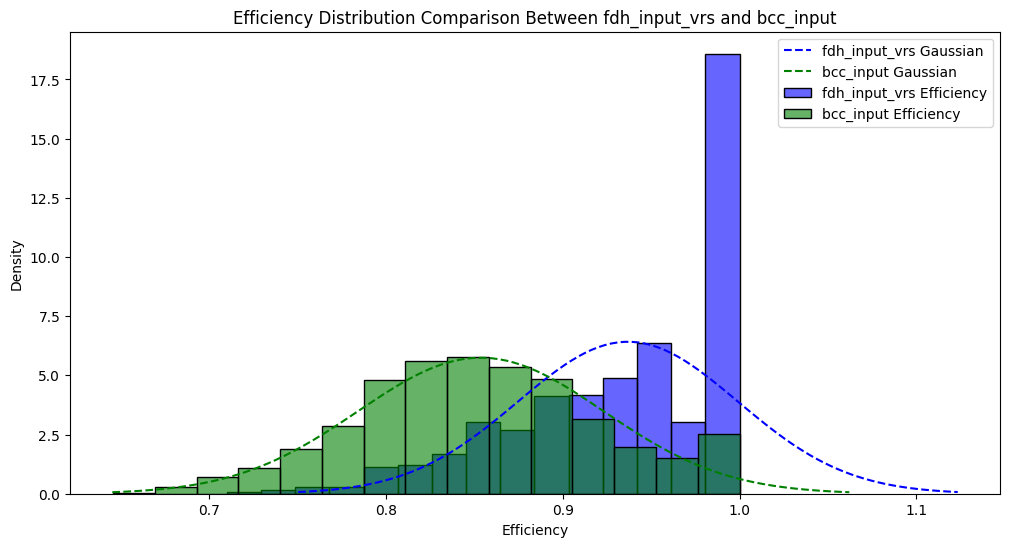

In [10]:
plot_comparison([pisa_results['fdh_input_vrs'], 'fdh_input_vrs'], [pisa_results['bcc_input'], 'bcc_input'])

In [11]:
data_FDHVRS = np.array(pisa_results['fdh_input_vrs']['efficiency']).reshape(-1, 1)  
data_DEAVRS = np.array(pisa_results['bcc_input']['efficiency']).reshape(-1, 1)  


In [12]:
li_vrs1 = litter(data_FDHVRS, data_DEAVRS, continuous_idx=[0], discrete_idx=[],alpha=0.05, n_boot=400)

In [14]:
li_vrs1

(np.float64(0.0), np.float64(16.52037279465284))

In [15]:
li_vrs2 = li_test(data_FDHVRS, data_DEAVRS, continuous_idx=[0], discrete_idx=[],alpha=0.05, n_boot=400)

In [16]:
li_vrs2

(np.float64(0.0), np.float64(189.2840360498897))

In [17]:
stats_FDHCRS = stats(pisa_results['fdh_input_crs'])
stats_DEACRS = stats(pisa_results['ccr_input'])

In [18]:
stats_DEACRS


{'avg': np.float64(0.8387445765796033),
 'min': np.float64(0.6142204798923188),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.0688147157490859),
 'num_eff': np.int64(19),
 'num_considered': 902}

In [19]:
stats_FDHCRS

{'avg': np.float64(0.8866490867960151),
 'min': np.float64(0.6667987519665545),
 'max': np.float64(1.0),
 'std_dev': np.float64(0.07098695189264928),
 'num_eff': np.int64(63),
 'num_considered': 902}

fdh_input_crs - Efficiency ratio (num_eff / num_considered): 0.07
ccr_input - Efficiency ratio (num_eff / num_considered): 0.02


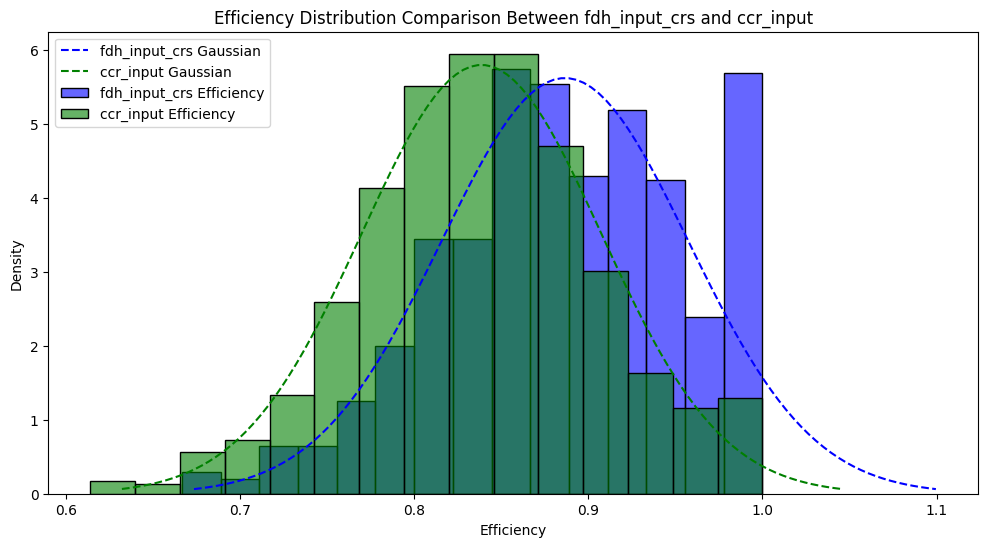

In [20]:

plot_comparison([pisa_results['fdh_input_crs'], 'fdh_input_crs'], [pisa_results['ccr_input'], 'ccr_input'])

In [21]:
data_FDHCRS = np.array(pisa_results['fdh_input_crs']['efficiency']).reshape(-1, 1)  
data_DEACRS = np.array(pisa_results['ccr_input']['efficiency']).reshape(-1, 1)  


In [23]:
li_crs = li_test(data_FDHCRS, data_DEACRS, continuous_idx=[0], discrete_idx=[],alpha=0.05, n_boot=400)

KeyboardInterrupt: 

In [ ]:
li_crs